This notebook is made to concat the outputs of the different augmentation and preprocessing steps. <hr>

In [3]:
import pandas as pd 

In [71]:
filenames = [
    "open_tasks_DE",
    "augmented_BT_DE", 
    "augmented_RD_DE", 
    "augmented_RI_DE", 
    "augmented_RS_DE", 
    "augmented_SR_DE", 
]
df = pd.DataFrame() 

for filename in filenames:
    _df = pd.read_csv("data/"+filename+".csv")
    df = pd.concat([df, _df],  ignore_index=True) 
df.to_csv("data/all_augmented_tasks_DE.csv", index_label=False)

for filename in filenames:
    _df = pd.read_csv("data/preprocessed_"+filename+".csv")
    df = pd.concat([df, _df],  ignore_index=True) 
df.to_csv("data/all_preprocessed_tasks_DE.csv", index_label=False)

In [2]:
filenames = [
    "open_tasks_EN",
    "augmented_BT_EN", 
    "augmented_RD_EN", 
    "augmented_RI_EN", 
    "augmented_RS_EN", 
    "augmented_SR_EN", 
] 
df = pd.DataFrame() 

for filename in filenames: 
    _df = pd.read_csv("data/"+filename+".csv")
    df = pd.concat([df, _df],  ignore_index=True) 
df.to_csv("data/all_augmented_tasks_EN.csv", index_label=False)

for filename in filenames: 
    _df = pd.read_csv("data/preprocessed_"+filename+".csv")
    df = pd.concat([df, _df],  ignore_index=True) 
df.to_csv("data/all_preprocessed_tasks_EN.csv", index_label=False)

<hr>

In [5]:
import gensim.corpora as corpora
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def get_word_counts(texts): 
    # create the vocabulary 
    vectorizer = CountVectorizer() 
    # Fit and transform the documents
    X = vectorizer.fit_transform(texts)
    # Get the occurrences of each word
    word_occurrences = X.toarray().sum(axis=0)
    # Map the indices to words in the vocabulary
    word_counts = {word: word_occurrences[idx] for word, idx in vectorizer.vocabulary_.items()}
    return word_counts

def plot_word_counts(word_counts):
    # Sort the word counts by frequency
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Extract words and their corresponding counts
    words, counts = zip(*sorted_word_counts)
    
    # Plot the word counts
    plt.figure(figsize=(20, 12))
    plt.bar(range(len(words)), counts, log=True)
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Occurrences')
    plt.title('Word Occurrences')
    plt.show()

    return sorted_word_counts

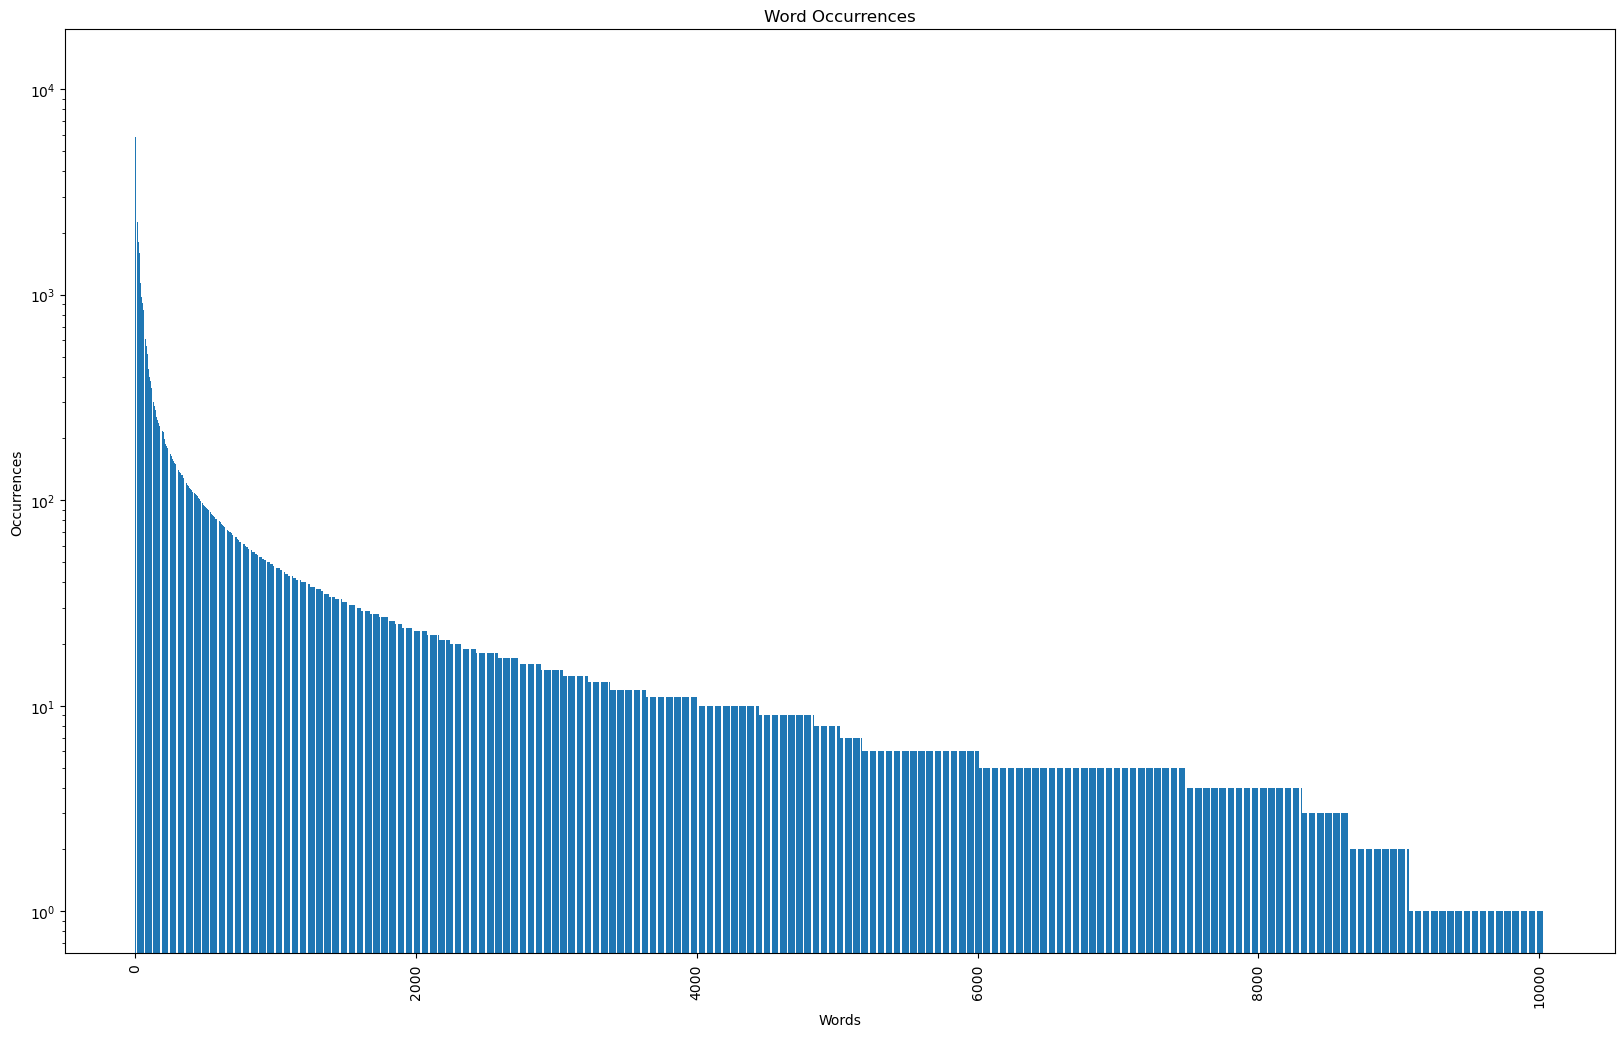

In [75]:
df = pd.read_csv("data/all_augmented_tasks_DE.csv")
df.dropna(subset=["description"], inplace=True)
texts = df["description"].to_list() 

sorted_word_counts = plot_word_counts(get_word_counts(texts))

In [1]:
# sorted_word_counts[:20], sorted_word_counts[-10:]

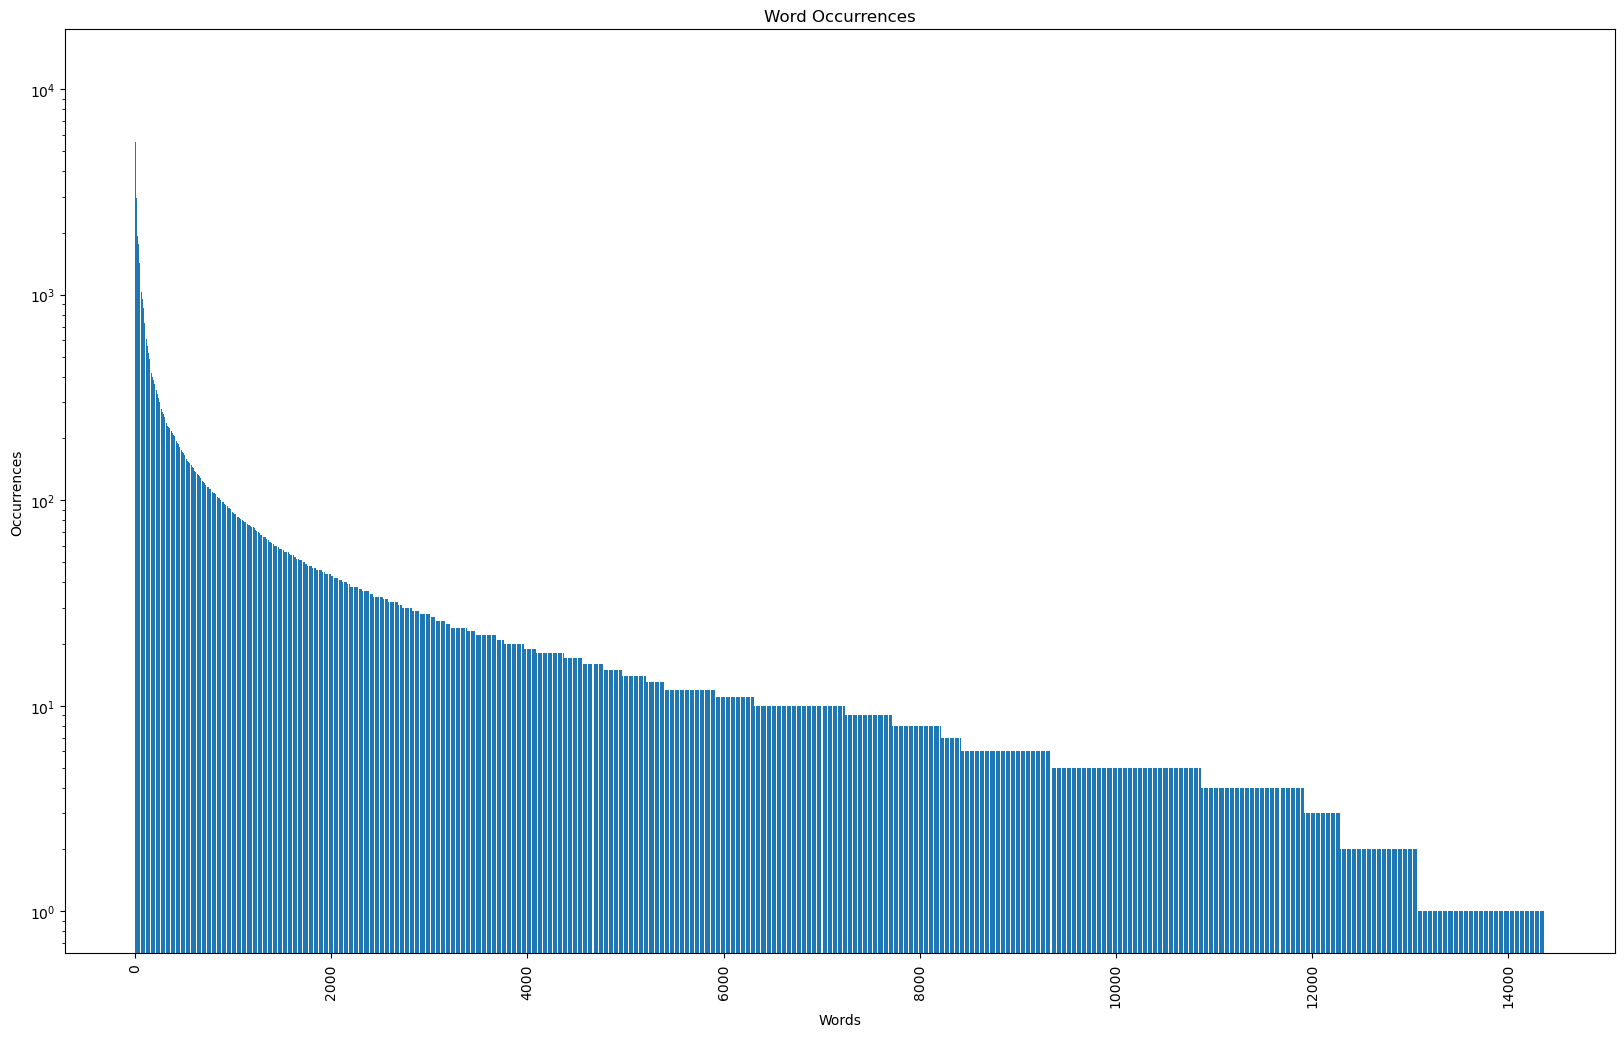

In [77]:
df = pd.read_csv("data/all_preprocessed_tasks_DE.csv")
df.dropna(subset=["description"], inplace=True)
texts = df["description"].to_list() 

sorted_word_counts = plot_word_counts(get_word_counts(texts))

<hr>

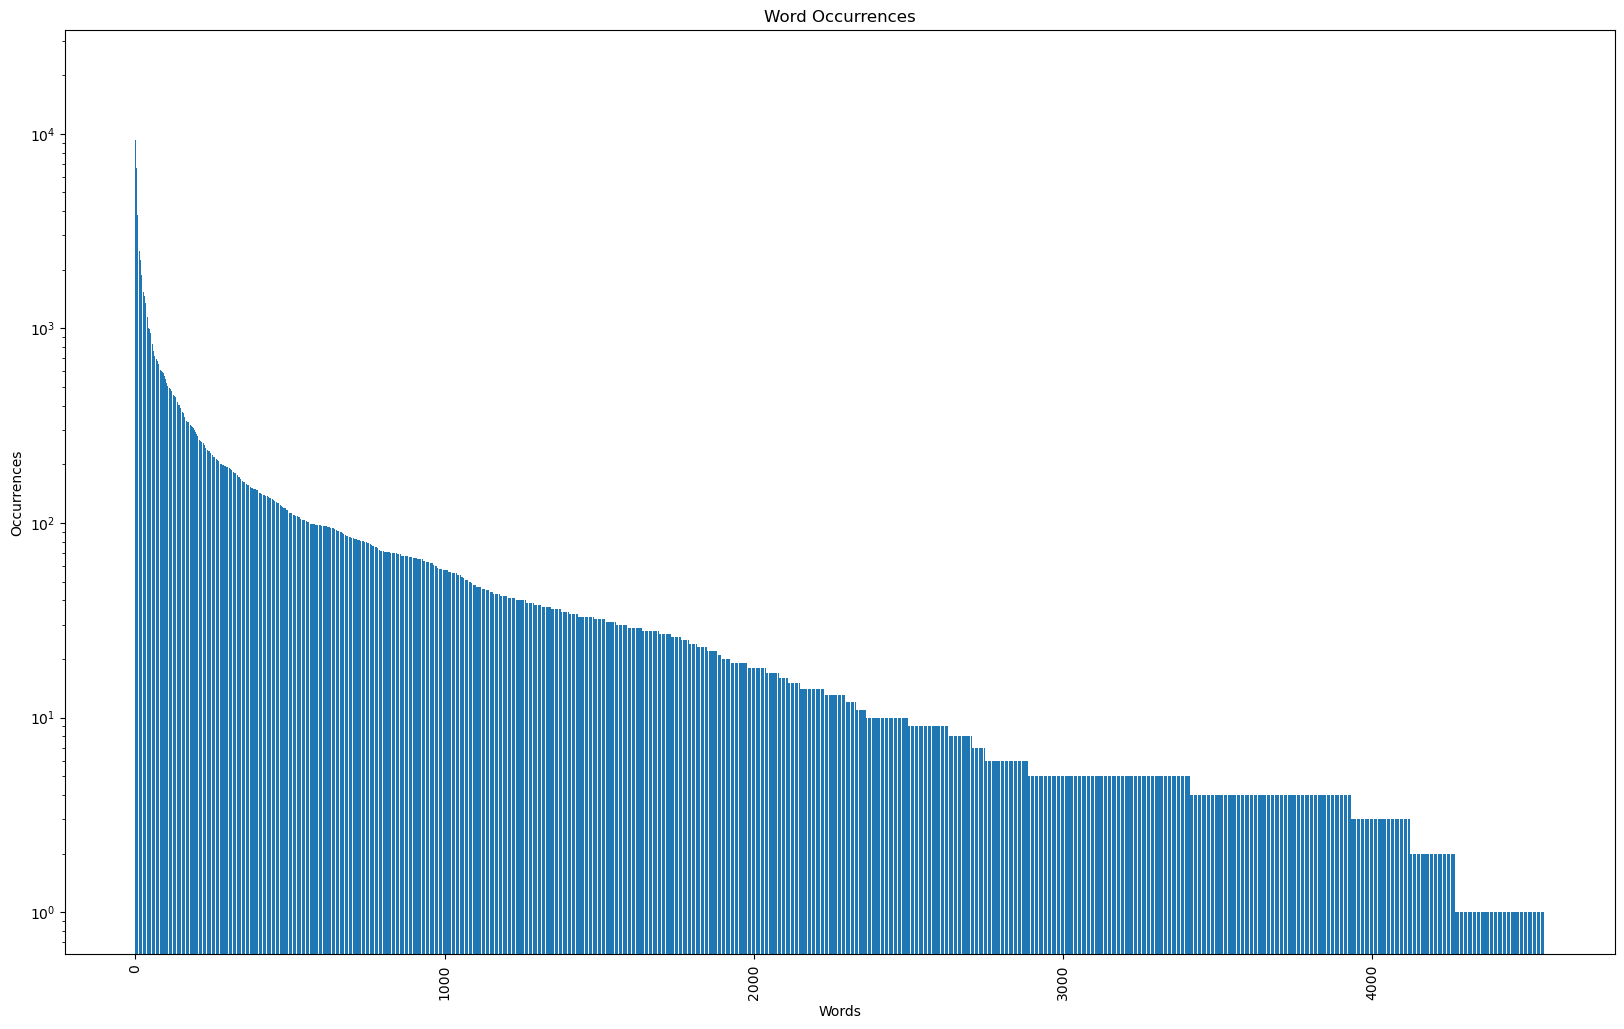

In [79]:
df = pd.read_csv("data/all_augmented_tasks_EN.csv")
df.dropna(subset=["description"], inplace=True)
texts = df["description"].to_list() 

sorted_word_counts = plot_word_counts(get_word_counts(texts))

In [80]:
sorted_word_counts[:10], sorted_word_counts[-10:]

([('the', 20685),
  ('and', 9285),
  ('to', 8702),
  ('in', 7079),
  ('of', 6625),
  ('it', 4996),
  ('you', 3895),
  ('was', 3827),
  ('is', 3757),
  ('that', 3485)],
 [('burglars', 1),
  ('classes', 1),
  ('housebed', 1),
  ('racons', 1),
  ('cosely', 1),
  ('outing', 1),
  ('terrain', 1),
  ('sneakers', 1),
  ('feminine', 1),
  ('questionnaire', 1)])

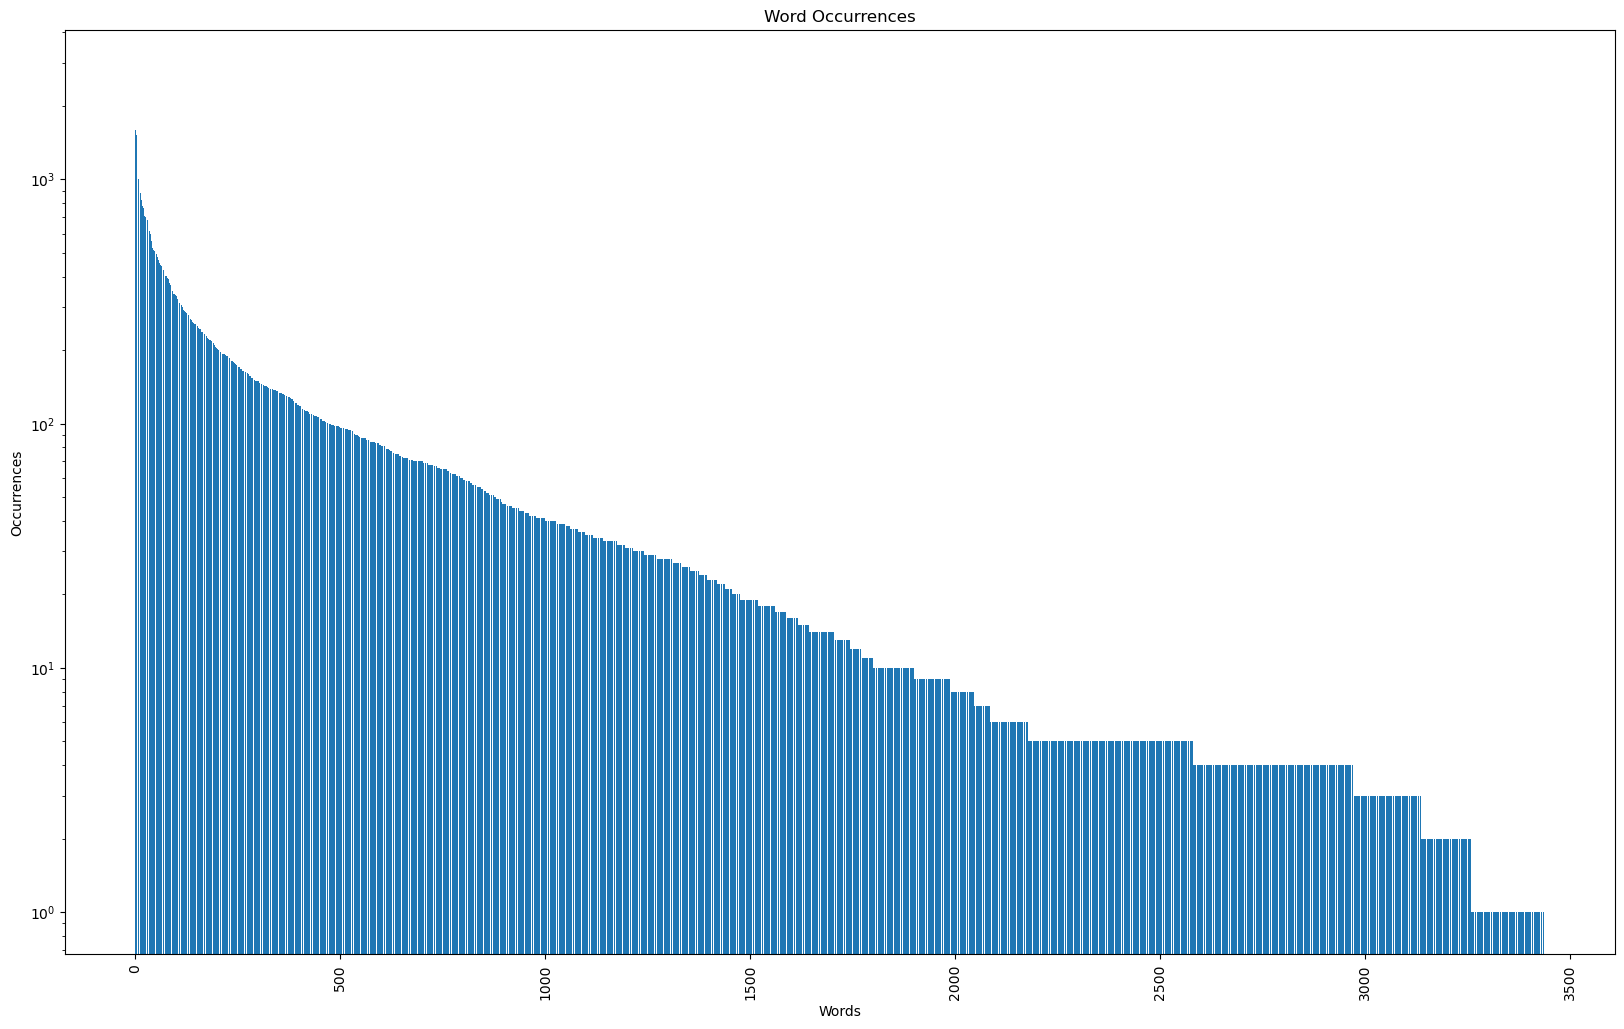

In [6]:
df = pd.read_csv("data/all_preprocessed_tasks_EN.csv")
df.dropna(subset=["description"], inplace=True)
texts = df["description"].to_list() 

sorted_word_counts = plot_word_counts(get_word_counts(texts))

In [8]:
sorted_word_counts[:50], sorted_word_counts[-10:]

([('like', 2745),
  ('go', 1589),
  ('say', 1564),
  ('get', 1519),
  ('see', 1304),
  ('make', 1244),
  ('name', 1236),
  ('come', 1042),
  ('one', 1008),
  ('man', 1004),
  ('look', 987),
  ('ship', 934),
  ('rise', 901),
  ('peopl', 883),
  ('luke', 847),
  ('live', 824),
  ('find', 803),
  ('well', 797),
  ('want', 781),
  ('day', 768),
  ('use', 761),
  ('oil', 720),
  ('die', 711),
  ('time', 710),
  ('year', 710),
  ('chri', 704),
  ('think', 701),
  ('take', 688),
  ('dora', 688),
  ('woman', 685),
  ('know', 684),
  ('great', 678),
  ('food', 642),
  ('water', 630),
  ('could', 617),
  ('still', 613),
  ('mani', 597),
  ('mine', 595),
  ('mean', 580),
  ('write', 577),
  ('help', 559),
  ('ga', 544),
  ('gwen', 525),
  ('place', 518),
  ('back', 514),
  ('friend', 514),
  ('two', 508),
  ('differ', 508),
  ('work', 505),
  ('last', 499)],
 [('children', 1),
  ('came', 1),
  ('fought', 1),
  ('better', 1),
  ('wo', 1),
  ('fell', 1),
  ('woke', 1),
  ('he', 1),
  ('stre', 1),
 